In [5]:
#import dependencies

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

print(pd.__version__)

1.3.5


In [2]:
# Read in White wine dataset (note file is semi-colon delimited)

White_Wine_df=pd.read_csv("winequality-white.csv",engine='python', delimiter='\;')
White_Wine_df.head(10)

,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [3]:
# Read in Red wine dataset (note file is semi-colon delimited)

Red_Wine_df=pd.read_csv("winequality-red.csv",engine='python', delimiter='\;')
Red_Wine_df.head(10)

,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [58]:
White_Wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   "fixed acidity"         4898 non-null   float64
 1   "volatile acidity"      4898 non-null   float64
 2   "citric acid"           4898 non-null   float64
 3   "residual sugar"        4898 non-null   float64
 4   "chlorides"             4898 non-null   float64
 5   "free sulfur dioxide"   4898 non-null   float64
 6   "total sulfur dioxide"  4898 non-null   float64
 7   "density"               4898 non-null   float64
 8   "pH"                    4898 non-null   float64
 9   "sulphates"             4898 non-null   float64
 10  "alcohol"               4898 non-null   float64
 11  "quality"               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [57]:
Red_Wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   "fixed acidity"         1599 non-null   float64
 1   "volatile acidity"      1599 non-null   float64
 2   "citric acid"           1599 non-null   float64
 3   "residual sugar"        1599 non-null   float64
 4   "chlorides"             1599 non-null   float64
 5   "free sulfur dioxide"   1599 non-null   float64
 6   "total sulfur dioxide"  1599 non-null   float64
 7   "density"               1599 non-null   float64
 8   "pH"                    1599 non-null   float64
 9   "sulphates"             1599 non-null   float64
 10  "alcohol"               1599 non-null   float64
 11  "quality"               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Rename columns (remove "" and space in names)

White_Wine_Rename_df=White_Wine_df.rename({'"fixed acidity"':'fixed_acidity',
                                           '"volatile acidity"':'volatile_acidity',
                                            '"citric acid"':'citric_acid',
                                           '"residual sugar"':'residual_sugar',
                                           '"chlorides"':'chlorides',
                                           '"free sulfur dioxide"':'free_sulfur_dioxide',
                                           '"total sulfur dioxide"':'total_sulfur_dioxide', 
                                           '"density"':'density',
                                           '"pH"':'pH',
                                          '"sulphates"':'sulphates',
                                          '"alcohol"':'alcohol',
                                          '"quality"':'quality'}, axis="columns") 


White_Wine_Rename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
#Rename columns (remove "" and space in names)

Red_Wine_Rename_df=Red_Wine_df.rename({'"fixed acidity"':'fixed_acidity',
                                           '"volatile acidity"':'volatile_acidity',
                                            '"citric acid"':'citric_acid',
                                           '"residual sugar"':'residual_sugar',
                                           '"chlorides"':'chlorides',
                                           '"free sulfur dioxide"':'free_sulfur_dioxide',
                                           '"total sulfur dioxide"':'total_sulfur_dioxide', 
                                           '"density"':'density',
                                           '"pH"':'pH',
                                          '"sulphates"':'sulphates',
                                          '"alcohol"':'alcohol',
                                          '"quality"':'quality'}, axis="columns") 


Red_Wine_Rename_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#check for null values

White_Wine_Rename_df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#check for null values

Red_Wine_Rename_df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
#add column Wine Type

White_Wine_Rename_df.insert(0, "Wine_Type", "White", True)
White_Wine_Rename_df

,Wine_Type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,White,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,White,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,White,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,White,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [11]:
#add column Wine Type

Red_Wine_Rename_df.insert(0, "Wine_Type", "Red", True)
Red_Wine_Rename_df

,Wine_Type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,Red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,Red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,Red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,Red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,Red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,Red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,Red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,Red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
# concatenate cleaned red and white dataframes

White_Red_Concat_df=pd.concat([White_Wine_Rename_df,Red_Wine_Rename_df])
White_Red_Concat_df.reset_index(inplace=True, drop=True)
White_Red_Concat_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine_Type             6497 non-null   object 
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [13]:
White_Red_Concat_df.tail(10)

,Wine_Type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
6487,Red,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
6488,Red,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
6489,Red,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
6490,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6491,Red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,Red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,Red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,Red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,Red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [14]:
White_Red_Concat_df.tail(10)

,Wine_Type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
6487,Red,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
6488,Red,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
6489,Red,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
6490,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6491,Red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,Red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,Red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,Red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,Red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,Red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [15]:
# Save concatenated file to CSV

White_Red_Concat_df.to_csv('wine_quality_White_Red_Concat.csv')

In [16]:
# plot white wine parameters 


fixed_acidity_white = White_Wine_Rename_df["fixed_acidity"]
volatile_acidity_white = White_Wine_Rename_df["volatile_acidity"]
citric_acid_white = White_Wine_Rename_df["citric_acid"]
residual_sugar_white = White_Wine_Rename_df["residual_sugar"]
chlorides_white = White_Wine_Rename_df["chlorides"]                                         
free_sulfur_dioxide_white = White_Wine_Rename_df["free_sulfur_dioxide"]
total_sulfur_dioxide_white = White_Wine_Rename_df["total_sulfur_dioxide"]
density_white = White_Wine_Rename_df["density"]                                       
pH_white = White_Wine_Rename_df["pH"]
sulphates_white = White_Wine_Rename_df["sulphates"]                                        
alcohol_white = White_Wine_Rename_df["alcohol"]


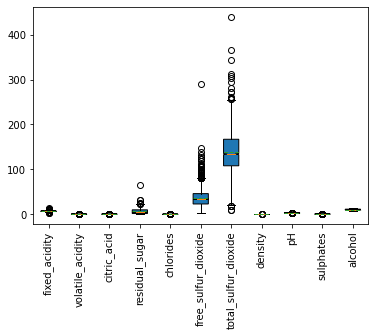

In [17]:
# box plots white wine

fig, ax = plt.subplots()

columns_white = [fixed_acidity_white,volatile_acidity_white,citric_acid_white,residual_sugar_white,chlorides_white, free_sulfur_dioxide_white, total_sulfur_dioxide_white, density_white,pH_white,sulphates_white,alcohol_white]
ax.boxplot(columns_white,notch=True, patch_artist=True,meanline=True, showmeans=True)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11], ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide","density","pH","sulphates","alcohol"], rotation=90)

plt.show()

In [18]:
Red_Wine_Rename_df.shape 

(1599, 13)

In [19]:
# plot red wine parameters (in family dataset)


fixed_acidity_red = Red_Wine_Rename_df["fixed_acidity"]
volatile_acidity_red = Red_Wine_Rename_df["volatile_acidity"]
citric_acid_red = Red_Wine_Rename_df["citric_acid"]
residual_sugar_red = Red_Wine_Rename_df["residual_sugar"]
chlorides_red = Red_Wine_Rename_df["chlorides"]                                         
free_sulfur_dioxide_red = Red_Wine_Rename_df["free_sulfur_dioxide"]
total_sulfur_dioxide_red = Red_Wine_Rename_df["total_sulfur_dioxide"]
density_red = Red_Wine_Rename_df["density"]                                       
pH_red = Red_Wine_Rename_df["pH"]
sulphates_red = Red_Wine_Rename_df["sulphates"]                                        
alcohol_red = Red_Wine_Rename_df["alcohol"]

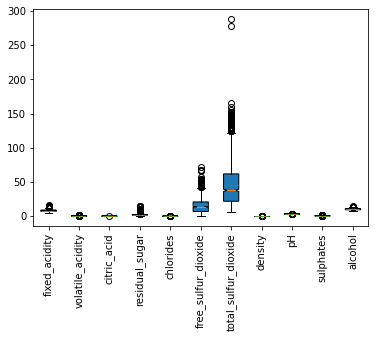

In [20]:
# box plots red wine

fig, ax = plt.subplots()

columns_red = [fixed_acidity_red,volatile_acidity_red,citric_acid_red,residual_sugar_red,chlorides_red, free_sulfur_dioxide_red, total_sulfur_dioxide_red, density_red,pH_red,sulphates_red,alcohol_red]
ax.boxplot(columns_red,notch=True, patch_artist=True,meanline=True, showmeans=True)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11], ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide","density","pH","sulphates","alcohol"], rotation=90)

plt.show()

In [21]:
White_Wine_Rename_df.shape 

(4898, 13)

In [31]:
# explore removing outliers (White Wine)

# IQR Method (note uses muliplier of 3 to remove extreme outliers, 1.5 removed too many samples from the dataset)

Q1w=White_Wine_Rename_df.quantile(0.25)
Q3w=White_Wine_Rename_df.quantile(0.75)
IQRw=Q3w-Q1w
lower_boundw=Q1w - 3 * IQRw
upper_boundw=Q3w + 3 * IQRw

lower_boundw,upper_boundw

(fixed_acidity            3.30000
 volatile_acidity        -0.12000
 citric_acid             -0.09000
 residual_sugar         -22.90000
 chlorides               -0.00600
 free_sulfur_dioxide    -46.00000
 total_sulfur_dioxide   -69.00000
 density                  0.97859
 pH                       2.52000
 sulphates               -0.01000
 alcohol                  3.80000
 quality                  2.00000
 dtype: float64,
 fixed_acidity            10.300000
 volatile_acidity          0.650000
 citric_acid               0.750000
 residual_sugar           34.500000
 chlorides                 0.092000
 free_sulfur_dioxide     115.000000
 total_sulfur_dioxide    344.000000
 density                   1.009232
 pH                        3.850000
 sulphates                 0.970000
 alcohol                  17.100000
 quality                   9.000000
 dtype: float64)

In [32]:
# explore removing outliers (Red Wine)

# IQR Method (note uses muliplier of 3 to remove extreme outliers, 1.5 removed too many samples from the dataset)

Q1r=Red_Wine_Rename_df.quantile(0.25)
Q3r=Red_Wine_Rename_df.quantile(0.75)
IQRr=Q3r-Q1r
lower_boundr=Q1r - 3 * IQRr
upper_boundr=Q3r + 3 * IQRr

lower_boundr,upper_boundr




(fixed_acidity            0.800000
 volatile_acidity        -0.360000
 citric_acid             -0.900000
 residual_sugar          -0.200000
 chlorides                0.010000
 free_sulfur_dioxide    -35.000000
 total_sulfur_dioxide   -98.000000
 density                  0.988895
 pH                       2.640000
 sulphates                0.010000
 alcohol                  4.700000
 quality                  2.000000
 dtype: float64,
 fixed_acidity            15.50000
 volatile_acidity          1.39000
 citric_acid               1.41000
 residual_sugar            4.70000
 chlorides                 0.15000
 free_sulfur_dioxide      63.00000
 total_sulfur_dioxide    182.00000
 density                   1.00454
 pH                        3.97000
 sulphates                 1.27000
 alcohol                  15.90000
 quality                   9.00000
 dtype: float64)

In [33]:
# Return a boolean array of the rows with (any) non-outlier column values and filter dataframe based on condition

IQR_White_Wine_Rename_df = White_Wine_Rename_df[~((White_Wine_Rename_df < lower_boundw) |(White_Wine_Rename_df > upper_boundw)).any(axis=1)]
IQR_White_Wine_Rename_df.shape  

C:\Users\KGaynor\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  This is separate from the ipykernel package so we can avoid doing imports until


(4690, 13)

In [34]:
# Return a boolean array of the rows with (any) non-outlier column values and filter dataframe based on condition

IQR_Red_Wine_Rename_df = Red_Wine_Rename_df[~((Red_Wine_Rename_df < lower_boundr) |(Red_Wine_Rename_df > upper_boundr)).any(axis=1)]
IQR_Red_Wine_Rename_df.shape   

C:\Users\KGaynor\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(1435, 13)

In [35]:
# concatenate cleaned red and white dataframes with outliers removed

IQR_White_Red_Concat_df=pd.concat([IQR_White_Wine_Rename_df,IQR_Red_Wine_Rename_df])
White_Red_Concat_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine_Type             6497 non-null   object 
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [36]:
# Save concatenated file to CSV

IQR_White_Red_Concat_df.to_csv('wine_quality_White_Red_Concat_remove_outliers.csv')

# save un-concatenated files to CSV
IQR_White_Wine_Rename_df.to_csv('wine_quality_White_remove_outliers.csv')
IQR_Red_Wine_Rename_df.to_csv('wine_quality_Red_remove_outliers.csv')

In [37]:
#Check correlation of parameters on data set with removed outliers
#possibly drop columns that are highly correlated before creating model

IQR_White_Wine_Rename_df.corr()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.047449,0.308072,0.080135,0.081917,-0.051972,0.082094,0.263164,-0.427383,-0.026380,-0.126068,-0.107214
volatile_acidity,-0.047449,1.000000,-0.163440,0.049805,-0.012257,-0.088125,0.085381,-0.014785,-0.033479,-0.056042,0.088501,-0.163424
citric_acid,0.308072,-0.163440,1.000000,0.106875,0.044730,0.094024,0.133137,0.162763,-0.151283,0.079534,-0.078023,-0.010275
residual_sugar,0.080135,0.049805,0.106875,1.000000,0.252926,0.337373,0.415218,0.835847,-0.207775,-0.029072,-0.477577,-0.102187
chlorides,0.081917,-0.012257,0.044730,0.252926,1.000000,0.148762,0.356812,0.476864,-0.022425,0.062649,-0.534007,-0.285198
free_sulfur_dioxide,-0.051972,-0.088125,0.094024,0.337373,0.148762,1.000000,0.613538,0.328000,-0.007092,0.076297,-0.258945,0.034498
total_sulfur_dioxide,0.082094,0.085381,0.133137,0.415218,0.356812,0.613538,1.000000,0.548763,0.002672,0.138050,-0.460346,-0.160964
density,0.263164,-0.014785,0.162763,0.835847,0.476864,0.328000,0.548763,1.000000,-0.095227,0.078821,-0.812849,-0.313417
pH,-0.427383,-0.033479,-0.151283,-0.207775,-0.022425,-0.007092,0.002672,-0.095227,1.000000,0.168613,0.110155,0.094652
sulphates,-0.026380,-0.056042,0.079534,-0.029072,0.062649,0.076297,0.138050,0.078821,0.168613,1.000000,-0.033064,0.058530


In [38]:
# Check correlation of parameters on data set with removed outliers
#possibly drop columns that are highly correlated before creating model

IQR_Red_Wine_Rename_df.corr()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.267774,0.693481,0.227038,0.250961,-0.160574,-0.109692,0.675408,-0.701672,0.206130,-0.091586,0.116555
volatile_acidity,-0.267774,1.000000,-0.573934,0.047601,0.108990,-0.016156,0.096103,0.022574,0.237104,-0.324287,-0.203524,-0.387266
citric_acid,0.693481,-0.573934,1.000000,0.158518,0.122111,-0.073313,0.010371,0.363332,-0.521631,0.286048,0.114375,0.240550
residual_sugar,0.227038,0.047601,0.158518,1.000000,0.247755,0.018839,0.081243,0.366090,-0.087096,0.043893,0.097943,-0.002865
chlorides,0.250961,0.108990,0.122111,0.247755,1.000000,-0.009703,0.100693,0.427896,-0.215494,-0.009155,-0.261578,-0.176484
free_sulfur_dioxide,-0.160574,-0.016156,-0.073313,0.018839,-0.009703,1.000000,0.657330,-0.079452,0.100004,0.054202,-0.044870,-0.037092
total_sulfur_dioxide,-0.109692,0.096103,0.010371,0.081243,0.100693,0.657330,1.000000,0.060616,-0.024625,-0.044420,-0.220066,-0.202603
density,0.675408,0.022574,0.363332,0.366090,0.427896,-0.079452,0.060616,1.000000,-0.323417,0.137152,-0.530205,-0.201622
pH,-0.701672,0.237104,-0.521631,-0.087096,-0.215494,0.100004,-0.024625,-0.323417,1.000000,-0.027502,0.198416,-0.064598
sulphates,0.206130,-0.324287,0.286048,0.043893,-0.009155,0.054202,-0.044420,0.137152,-0.027502,1.000000,0.224222,0.379043


In [39]:
# Check wine quality ratings for red and white wines (in family dataset)

X = IQR_White_Red_Concat_df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

y = IQR_White_Red_Concat_df['quality']

IQR_White_Red_Concat_df.groupby(["Wine_Type","quality"])["quality"].count()

Wine_Type  quality
Red        3             6
           4            48
           5           605
           6           584
           7           176
           8            16
White      3            13
           4           142
           5          1371
           6          2114
           7           874
           8           171
           9             5
Name: quality, dtype: int64

In [40]:
# plot white wine parameters (in family dataset)


fixed_acidity_white = IQR_White_Wine_Rename_df["fixed_acidity"]
volatile_acidity_white = IQR_White_Wine_Rename_df["volatile_acidity"]
citric_acid_white = IQR_White_Wine_Rename_df["citric_acid"]
residual_sugar_white = IQR_White_Wine_Rename_df["residual_sugar"]
chlorides_white = IQR_White_Wine_Rename_df["chlorides"]                                         
free_sulfur_dioxide_white = IQR_White_Wine_Rename_df["free_sulfur_dioxide"]
total_sulfur_dioxide_white = IQR_White_Wine_Rename_df["total_sulfur_dioxide"]
density_white = IQR_White_Wine_Rename_df["density"]                                       
pH_white = IQR_White_Wine_Rename_df["pH"]
sulphates_white = IQR_White_Wine_Rename_df["sulphates"]                                        
alcohol_white = IQR_White_Wine_Rename_df["alcohol"]





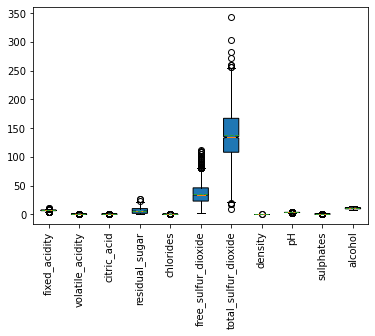

In [41]:
# box plots white wine

fig, ax = plt.subplots()

columns_white = [fixed_acidity_white,volatile_acidity_white,citric_acid_white,residual_sugar_white,chlorides_white, free_sulfur_dioxide_white, total_sulfur_dioxide_white, density_white,pH_white,sulphates_white,alcohol_white]
ax.boxplot(columns_white,notch=True, patch_artist=True,meanline=True, showmeans=True)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11], ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide","density","pH","sulphates","alcohol"], rotation=90)

plt.show()

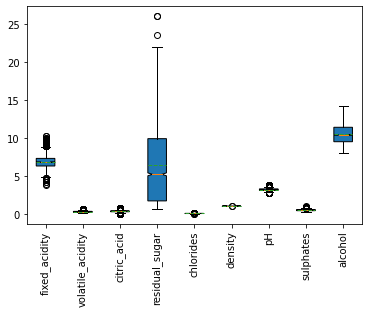

In [42]:
#box plots remove free and total dioxides (largest spread) white wine

fig, ax = plt.subplots()
columns_white = [fixed_acidity_white,volatile_acidity_white,citric_acid_white,residual_sugar_white,chlorides_white, density_white,pH_white,sulphates_white,alcohol_white]
ax.boxplot(columns_white,notch=True, patch_artist=True,meanline=True, showmeans=True)
plt.xticks([1,2,3,4,5,6,7,8,9], ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","density","pH","sulphates","alcohol"], rotation=90)

plt.show()

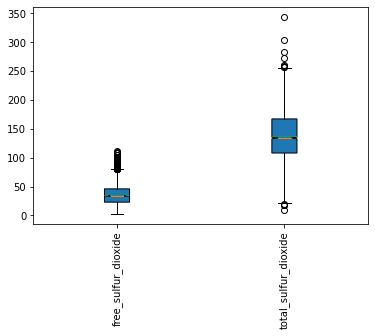

In [44]:
#box plots remove free and total dioxides (largest spread) white wine

fig, ax = plt.subplots()

columns_white = [free_sulfur_dioxide_white, total_sulfur_dioxide_white]
ax.boxplot(columns_white,notch=True, patch_artist=True,meanline=True, showmeans=True)
plt.xticks([1,2], ["free_sulfur_dioxide", "total_sulfur_dioxide"], rotation=90)

plt.show()

In [45]:
# plot red wine parameters (in family dataset)


fixed_acidity_red = IQR_Red_Wine_Rename_df["fixed_acidity"]
volatile_acidity_red = IQR_Red_Wine_Rename_df["volatile_acidity"]
citric_acid_red = IQR_Red_Wine_Rename_df["citric_acid"]
residual_sugar_red = IQR_Red_Wine_Rename_df["residual_sugar"]
chlorides_red = IQR_Red_Wine_Rename_df["chlorides"]                                         
free_sulfur_dioxide_red = IQR_Red_Wine_Rename_df["free_sulfur_dioxide"]
total_sulfur_dioxide_red = IQR_Red_Wine_Rename_df["total_sulfur_dioxide"]
density_red = IQR_Red_Wine_Rename_df["density"]                                       
pH_red = IQR_Red_Wine_Rename_df["pH"]
sulphates_red = IQR_Red_Wine_Rename_df["sulphates"]                                        
alcohol_red = IQR_Red_Wine_Rename_df["alcohol"]

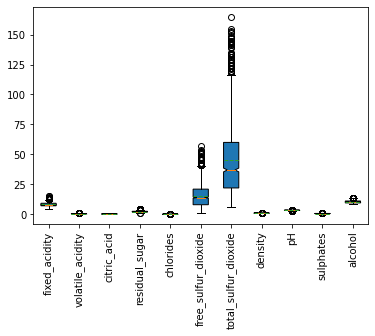

In [46]:
# box plots red wine

fig, ax = plt.subplots()

columns_red = [fixed_acidity_red,volatile_acidity_red,citric_acid_red,residual_sugar_red,chlorides_red, free_sulfur_dioxide_red, total_sulfur_dioxide_red, density_red,pH_red,sulphates_red,alcohol_red]
ax.boxplot(columns_red,notch=True, patch_artist=True,meanline=True, showmeans=True)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11], ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide","density","pH","sulphates","alcohol"], rotation=90)

plt.show()

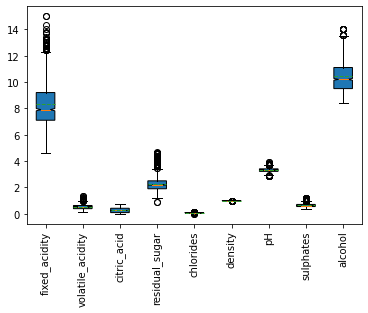

In [47]:
#box plots remove free and total dioxides (largest spread) red wine

fig, ax = plt.subplots()
columns_red = [fixed_acidity_red,volatile_acidity_red,citric_acid_red,residual_sugar_red,chlorides_red, density_red,pH_red,sulphates_red,alcohol_red]
ax.boxplot(columns_red,notch=True, patch_artist=True,meanline=True, showmeans=True)
plt.xticks([1,2,3,4,5,6,7,8,9], ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","density","pH","sulphates","alcohol"], rotation=90)

plt.show()

In [61]:
# Investigate removing outliers (not entire row); this will create a file with null values; White Wine
# use 1.5*IQR

IQR2_White_Wine_Rename_df = White_Wine_Rename_df[~((White_Wine_Rename_df < (Q1w - 1.5 * IQRw)) |(White_Wine_Rename_df > (Q3w + 1.5 * IQRw)))]
IQR2_White_Wine_Rename_df


C:\Users\KGaynor\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


,Wine_Type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6.0
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6.0
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6.0
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,White,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0
4894,White,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0
4895,White,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0
4896,White,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0


In [51]:
IQR2_White_Wine_Rename_df.shape

(4898, 13)

In [54]:
# Investigate removing outliers (not entire row); this will create a file with null values; Red Wine
# use 1.5*IQR

IQR2_Red_Wine_Rename_df = Red_Wine_Rename_df[~((Red_Wine_Rename_df < (Q1r - 1.5 * IQRr)) |(Red_Wine_Rename_df > (Q3r + 1.5 * IQRr)))]
IQR2_Red_Wine_Rename_df.head(10)

C:\Users\KGaynor\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


,Wine_Type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,Red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,Red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,Red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,Red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
5,Red,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0
6,Red,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5.0
7,Red,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.0
8,Red,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0
9,Red,7.5,0.50,0.36,NaN,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5.0


In [55]:
IQR2_Red_Wine_Rename_df.shape

(1599, 13)

In [62]:
# save un-concatenated files to CSV (in-family Rows NOT removed)
IQR2_White_Wine_Rename_df.to_csv('wine_quality_White_remove_outliers2.csv')
IQR2_Red_Wine_Rename_df.to_csv('wine_quality_Red_remove_outliers2.csv')

In [ ]:
# Investigate Datawig (impute missing values for machine learning)

import datawig